# GERMS-ML

## Meeting #2: A small case study with groundwater

We'll begin working on Jae's data from his paper *"A Data Mining Approach to Predict In Situ Detoxification Potential of Chlorinated Ethenes."* You can find the paper [here](https://pubs.acs.org/doi/abs/10.1021/acs.est.5b05090). We'll start by reading in the data:

In [1]:
import pandas as pd

gw_all = pd.read_excel("../data/gw.xlsx", sheet_name = None, 
                   skiprows = [0])

The data was stored in an Excel spreadsheet. By default, Pandas reads in the entire sheet as a dictionary. To access a dataframe representation of a particular sheet, just pass the name of that sheet to the resulting object. We can call `gw_all.keys()` to see all of the valid keys for this dictionary.

In [2]:
gw_all.keys()

odict_keys(['Raw_Sorted', 'Raw_Sorted_3month', 'Sheet1'])

We're just interested in the `Raw_Sorted` dataset for today. We'll save that to its own object.

In [3]:
raw_sorted = gw_all['Raw_Sorted']

Let's see what we're working with:

In [4]:
raw_sorted.describe()

,tceA,bvcA,vcrA,bvc+vcrA,t+b+v,Bac,PCE,TCE,cDCE,tDCE,...,Methane,pH,DO,Redox,NO3,NO2,Ferrous,Sulfate,TOC,Chloride
count,6.000000e+01,6.000000e+01,60.000000,6.000000e+01,6.000000e+01,1.200000e+01,222.000000,222.000000,222.000000,214.000000,...,222.000000,221.000000,221.000000,218.000000,214.000000,170.000000,190.000000,221.000000,222.000000,214.000000
mean,1.265321e+05,9.071605e+04,66006.196667,1.567222e+05,2.832544e+05,1.615025e+07,1943.458468,243.405342,1030.916216,48.076589,...,3523.983599,6.767421,1.695792,-66.949266,2.867991,0.547300,5.569263,44.496403,374.515991,63.530280
std,4.964519e+05,4.637998e+05,122417.816884,5.088562e+05,7.512042e+05,4.109335e+07,14392.404331,1017.279534,3887.285907,217.146400,...,5901.727258,0.574998,3.682131,98.747869,6.871372,0.924471,20.372691,82.586378,1231.753786,83.764297
min,2.000000e-01,0.000000e+00,0.500000,7.000000e-01,1.200000e+00,5.160000e+05,0.000000,0.200000,0.200000,0.000000,...,0.013000,5.610000,0.010000,-445.000000,0.040000,0.100000,0.000000,0.000000,0.800000,2.400000
25%,3.125000e+00,2.870000e+01,42.025000,7.318000e+02,1.075450e+03,1.130000e+06,0.270000,1.000000,11.000000,0.410000,...,58.025000,6.490000,0.340000,-116.375000,0.500000,0.500000,0.042500,3.530000,6.665000,21.800000
50%,4.265000e+01,1.065000e+03,1290.500000,8.170000e+03,1.425665e+04,2.895000e+06,1.150000,9.350000,95.200000,1.000000,...,621.500000,6.670000,0.610000,-79.100000,0.500000,0.500000,0.405000,27.400000,12.650000,32.350000
75%,2.467500e+04,8.620000e+03,49725.000000,1.695014e+05,1.946400e+05,8.585000e+06,8.450000,59.250000,687.500000,6.975000,...,4475.000000,6.860000,1.810000,-22.375000,1.117500,0.500000,1.357500,53.800000,36.175000,68.750000
max,3.610000e+06,3.540000e+06,456000.000000,3.830000e+06,4.130000e+06,1.460000e+08,149300.000000,10000.000000,51000.000000,2100.000000,...,34600.000000,9.160000,47.100000,227.600000,63.900000,12.000000,190.000000,666.000000,8300.000000,470.000000


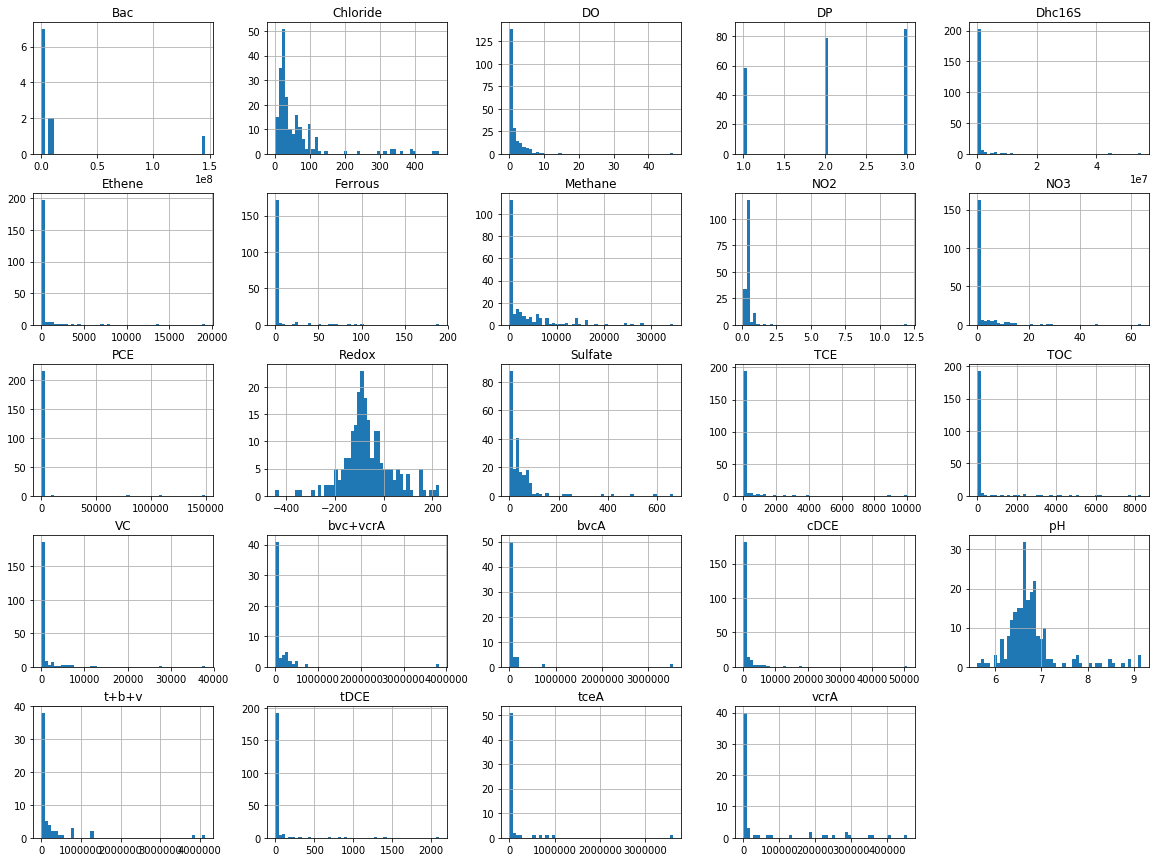

In [5]:
%matplotlib inline   
import matplotlib.pyplot as plt

raw_sorted.hist(bins = 50, figsize = (20, 15));

### Question 1

* What do these histograms and the column descriptions tell us?

### Handling missing values and non-numeric data

Something we want to be aware of is just how much of the data is missing. Most algorithms can't handle missing data, so we have to decide what we want to do with it before feeding the data into an algorithm. Typical choices are:

* Remove observations (rows) with any missing values
* Remove attributes (columns) with any missing values
* Impute missing values

There are variations on these, but these are the most common ones. Personally, I remove attributes that have over 30% of its values missing and I impute the rest (this number isn't something I've thought deeply about). Let's see what percentage of each column is missing:

In [11]:
def get_missing_percentage(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

In [7]:
missing_percentage = get_missing_percentage(raw_sorted)
missing_percentage

,column_name,percent_missing
Internal Wel lID,Internal Wel lID,0.000000
Date,Date,0.000000
tceA,tceA,72.972973
bvcA,bvcA,72.972973
vcrA,vcrA,72.972973
bvc+vcrA,bvc+vcrA,72.972973
t+b+v,t+b+v,72.972973
Bac,Bac,94.594595
PCE,PCE,0.000000
TCE,TCE,0.000000


There are quite a few columns with over 30% of its values missing. Let's go ahead and remove them. First, we'll go ahead and make a list of all those column names:

In [12]:
variables_to_drop = missing_percentage.query('percent_missing > 30')

In [13]:
variables_to_drop

,column_name,percent_missing
tceA,tceA,72.972973
bvcA,bvcA,72.972973
vcrA,vcrA,72.972973
bvc+vcrA,bvc+vcrA,72.972973
t+b+v,t+b+v,72.972973
Bac,Bac,94.594595


Here are the column names before dropping:

In [14]:
list(raw_sorted)

['Internal Wel lID',
 'Date',
 'tceA',
 'bvcA',
 'vcrA',
 'bvc+vcrA',
 't+b+v',
 'Bac',
 'PCE',
 'TCE',
 'cDCE ',
 'tDCE ',
 'VC',
 'Ethene',
 'DP',
 'Dhc16S',
 'Methane',
 'pH ',
 'DO',
 'Redox',
 'NO3',
 'NO2',
 'Ferrous',
 'Sulfate',
 'TOC',
 'Chloride']

And the column names after dropping them:

In [15]:
raw_sorted.drop(variables_to_drop['column_name'], axis = 1, inplace = True)

In [16]:
list(raw_sorted)

['Internal Wel lID',
 'Date',
 'PCE',
 'TCE',
 'cDCE ',
 'tDCE ',
 'VC',
 'Ethene',
 'DP',
 'Dhc16S',
 'Methane',
 'pH ',
 'DO',
 'Redox',
 'NO3',
 'NO2',
 'Ferrous',
 'Sulfate',
 'TOC',
 'Chloride']

Another concern is how to handle non-numeric data. Here, `Internal Wel lID` and `Date` are the only non-numerical attributes. It's possible that there are phenomena happening at certain time points or at certain wells (or at certain wells over a period of time) that are worth capturing. We're going to ignore that for now:

In [17]:
raw_sorted.drop(["Internal Wel lID", "Date"], axis = 1, inplace = True)

In [18]:
list(raw_sorted)

['PCE',
 'TCE',
 'cDCE ',
 'tDCE ',
 'VC',
 'Ethene',
 'DP',
 'Dhc16S',
 'Methane',
 'pH ',
 'DO',
 'Redox',
 'NO3',
 'NO2',
 'Ferrous',
 'Sulfate',
 'TOC',
 'Chloride']

### Examining attribute-by-attribute relationships

Before we pick our models, we want to check out if there are any obvious or interesting relationships going on between variables. One easy way to do this is by looking at the correlation between variables:

In [19]:
gw_corr_matrix = raw_sorted.corr(method = "pearson")

gw_corr_matrix["DP"].sort_values(ascending = False)

DP          1.000000
Redox       0.341748
NO3         0.315322
Sulfate     0.241606
NO2         0.191762
Chloride    0.191427
TCE         0.186826
PCE         0.148893
cDCE        0.106581
DO          0.005669
TOC        -0.051471
Dhc16S     -0.064401
VC         -0.070790
tDCE       -0.089825
pH         -0.102188
Ethene     -0.298441
Ferrous    -0.335485
Methane    -0.409594
Name: DP, dtype: float64

There doesn't seem to be any strong linear relationships between variables. We'll visualize the highest ranking correlations just to be sure, though:

In [20]:
interesting_attributes = list(abs(gw_corr_matrix["DP"]).sort_values(ascending = False).head(6).index)
interesting_attributes.remove("DP")

In [21]:
interesting_attributes

['Methane', 'Redox', 'Ferrous', 'NO3', 'Ethene']

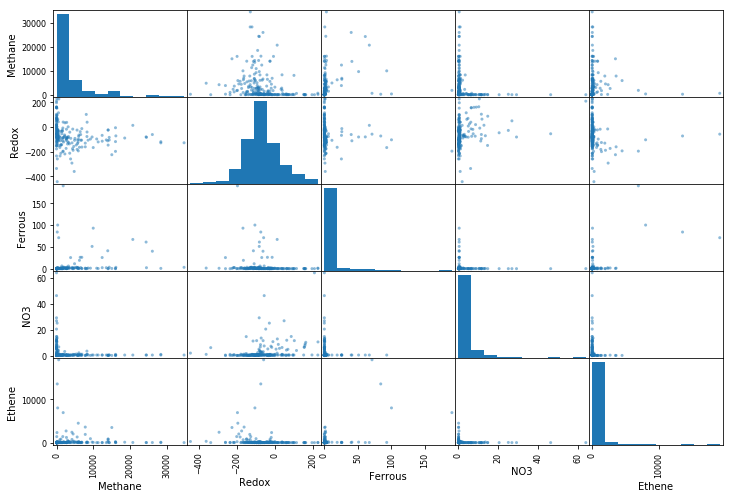

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(raw_sorted[interesting_attributes], figsize=(12, 8));

### Question 2

* How do you read this?
* How would finding a strong correlation between variables inform our choice of model?

### Preprocessing the data

As always, we split our data into testing and training sets before we proceed. We start by separating our target variable `DP`:

In [23]:
gw_targets = raw_sorted["DP"]

In [24]:
gw_targets.shape

(222,)

In [25]:
gw_attributes = raw_sorted.loc[:, raw_sorted.columns != "DP"]

In [26]:
gw_attributes.shape

(222, 17)

And now we'll use `train_test_split` to separate the data into training and testing sets:

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    gw_attributes, gw_targets, test_size = 0.2, random_state = 489)

We're now going to address the remaining missing values. I mentioned previously that I throw away attributes with more than 30% missing observations. We'll now impute the remaining attributes using `SimpleImputer` set to `median`.

In [29]:
from sklearn.impute import SimpleImputer

gw_imputer = SimpleImputer(strategy = "median")

We'll now fit the imputer to the training data by calling its `fit` method:

In [30]:
gw_imputer.fit(x_train)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

`gw_imputer` has calculated the median of all the data. We can see the calculated medians in the `statistics` attribute of `gw_imputer`:

In [31]:
gw_imputer.statistics_

array([ 1.70e+00,  1.00e+01,  9.40e+01,  1.00e+00,  4.35e+01,  3.00e+00,
        1.32e+04,  6.33e+02,  6.65e+00,  5.70e-01, -7.81e+01,  5.00e-01,
        5.00e-01,  4.70e-01,  2.84e+01,  1.40e+01,  3.28e+01])

And we can verify that:

In [32]:
x_train.median()

PCE             1.70
TCE            10.00
cDCE           94.00
tDCE            1.00
VC             43.50
Ethene          3.00
Dhc16S      13200.00
Methane       633.00
pH              6.65
DO              0.57
Redox         -78.10
NO3             0.50
NO2             0.50
Ferrous         0.47
Sulfate        28.40
TOC            14.00
Chloride       32.80
dtype: float64

Now that the imputer has been fit to the data, we can fill in the missing values via the `transform` method:

In [33]:
gw_imputer.transform(x_train)

array([[5.20e+00, 4.40e+00, 2.40e+02, ..., 7.02e+01, 1.37e+01, 9.77e+01],
       [1.70e+02, 3.90e+01, 6.00e+01, ..., 4.13e+01, 5.99e+00, 2.80e+01],
       [6.30e-01, 9.10e+00, 1.10e+01, ..., 2.34e+01, 5.69e+01, 3.78e+01],
       ...,
       [2.00e-01, 2.10e+00, 1.52e+01, ..., 3.26e+01, 2.50e+00, 2.43e+01],
       [2.70e-01, 2.80e-01, 2.50e+00, ..., 4.54e+01, 6.80e+00, 3.28e+01],
       [9.80e+00, 1.20e+00, 1.50e+00, ..., 6.39e+01, 9.10e+00, 2.53e+01]])

This returns a numpy array. We can convert it back to a dataframe by doing:

In [34]:
x_train_imp = pd.DataFrame(gw_imputer.transform(x_train), 
                          columns = x_train.columns)

In [35]:
x_train_imp.head()

,PCE,TCE,cDCE,tDCE,VC,Ethene,Dhc16S,Methane,pH,DO,Redox,NO3,NO2,Ferrous,Sulfate,TOC,Chloride
0,5.20,4.4,240.0,6.10,180.00,40.4,650000.0,633.00,6.88,0.38,226.8,0.500,0.5,1.14,70.200,13.70,97.7
1,170.00,39.0,60.0,0.58,15.00,0.5,768000.0,346.00,6.74,1.29,61.3,4.320,0.5,0.02,41.300,5.99,28.0
2,0.63,9.1,11.0,1.20,0.34,0.5,10.0,0.25,6.84,4.30,158.8,7.900,0.5,0.06,23.400,56.90,37.8
3,60.00,20.0,41.0,1300.00,1100.00,8040.0,103000.0,314.00,6.32,0.04,-105.0,0.500,0.5,100.00,0.000,1900.00,32.8
4,65.00,47.0,1000.0,12.00,550.00,119.0,5700000.0,2750.00,6.75,0.90,-84.6,0.663,0.5,3.30,0.598,12.40,47.3


We can see if the missing values have been filled in with our `get_missing_percentage` function:

In [36]:
get_missing_percentage(x_train_imp)

,column_name,percent_missing
PCE,PCE,0.0
TCE,TCE,0.0
cDCE,cDCE,0.0
tDCE,tDCE,0.0
VC,VC,0.0
Ethene,Ethene,0.0
Dhc16S,Dhc16S,0.0
Methane,Methane,0.0
pH,pH,0.0
DO,DO,0.0


Next, we'll do some feature scaling. We're choosing to do standardization ($z$-transform) here instead of normalization (min-max scaling). The process is pretty much the same as imputing: we create an imputer, `fit` it to our data, and then use it to `transform` the data.

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train_imp)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [38]:
x_train_imp.describe()

,PCE,TCE,cDCE,tDCE,VC,Ethene,Dhc16S,Methane,pH,DO,Redox,NO3,NO2,Ferrous,Sulfate,TOC,Chloride
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,1.770000e+02,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1593.060565,167.091785,876.727119,55.609209,1116.773503,413.684064,9.989590e+05,3882.396102,6.740113,1.716667,-66.351977,3.164175,0.571864,5.779096,43.357768,461.591864,63.868023
std,11647.531566,507.830728,2120.842169,237.788502,3963.105582,1963.689349,5.445042e+06,6355.866850,0.565333,4.015127,99.939745,7.436981,0.896873,21.014559,81.461096,1366.226498,85.674299
min,0.000000,0.200000,0.200000,0.000000,0.200000,0.010000,1.000000e+01,0.013000,5.610000,0.010000,-445.000000,0.050000,0.100000,0.000000,0.000000,0.800000,2.400000
25%,0.270000,0.890000,7.600000,0.410000,2.100000,0.500000,1.538000e+01,57.000000,6.460000,0.330000,-113.000000,0.500000,0.500000,0.070000,3.530000,7.220000,21.800000
50%,1.700000,10.000000,94.000000,1.000000,43.500000,3.000000,1.320000e+04,633.000000,6.650000,0.570000,-78.100000,0.500000,0.500000,0.470000,28.400000,14.000000,32.800000
75%,9.500000,63.000000,770.000000,6.900000,320.000000,87.000000,2.310000e+05,5600.000000,6.840000,1.700000,-20.300000,1.150000,0.500000,1.130000,54.700000,56.900000,68.000000
max,108700.000000,3900.000000,18000.000000,2100.000000,38000.000000,19200.000000,5.500000e+07,34600.000000,9.140000,47.100000,227.600000,63.900000,12.000000,190.000000,666.000000,8300.000000,470.000000


In [39]:
x_train_imp = pd.DataFrame(scaler.transform(x_train_imp),
                           columns = x_train_imp.columns)

In [40]:
x_train_imp.describe()

,PCE,TCE,cDCE,tDCE,VC,Ethene,Dhc16S,Methane,pH,DO,Redox,NO3,NO2,Ferrous,Sulfate,TOC,Chloride
count,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02
mean,-6.570388e-17,2.069907e-17,5.017957e-18,-2.195356e-18,4.390713e-17,8.467803e-18,1.677879e-17,3.136223e-18,-6.418290e-16,6.272446e-18,7.213313e-18,5.268855e-17,-1.881734e-17,-1.285852e-17,1.787647e-17,-7.087865e-17,1.881734e-18
std,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00
min,-1.371604e-01,-3.295689e-01,-4.144645e-01,-2.345234e-01,-2.825413e-01,-2.112593e-01,-1.839807e-01,-6.125674e-01,-2.004694e+00,-4.262651e-01,-3.799511e+00,-4.199297e-01,-5.276142e-01,-2.757845e-01,-5.337612e-01,-3.382302e-01,-7.194970e-01
25%,-1.371371e-01,-3.282064e-01,-4.109654e-01,-2.327943e-01,-2.820605e-01,-2.110090e-01,-1.839798e-01,-6.035759e-01,-4.968890e-01,-3.463404e-01,-4.680856e-01,-3.592497e-01,-8.035503e-02,-2.724441e-01,-4.903047e-01,-3.335178e-01,-4.924156e-01
50%,-1.370140e-01,-3.102164e-01,-3.701113e-01,-2.303060e-01,-2.715846e-01,-2.097323e-01,-1.815515e-01,-5.126939e-01,-1.598503e-01,-2.863968e-01,-1.178845e-01,-3.592497e-01,-8.035503e-02,-2.533556e-01,-1.841395e-01,-3.285412e-01,-3.636582e-01
75%,-1.363424e-01,-2.055549e-01,-5.046575e-02,-2.054237e-01,-2.016181e-01,-1.668343e-01,-1.414383e-01,2.710058e-01,1.771883e-01,-4.162745e-03,4.621047e-01,-2.716007e-01,-8.035503e-02,-2.218598e-01,1.396299e-01,-2.970517e-01,4.836572e-02
max,9.221764e+00,7.371547e+00,8.096713e+00,8.621908e+00,9.333049e+00,9.593987e+00,9.945604e+00,4.846663e+00,4.257130e+00,1.133515e+01,2.949636e+00,8.189899e+00,1.277834e+01,8.791215e+00,7.665114e+00,5.753544e+00,4.753866e+00


### Question 1.

* Why did we split the data into training and testing sets before we imputed the missing values or scaled the data?
* Why might we choose to impute based on median values instead of mean values?
* Why would we choose to standardize the data instead of normalize it?


### Making life easier with pipelines

Doing all of the preprocessing is a big pain in the butt. We can wrap it all up into a pipeline to make this process more painless:

In [41]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

transformation_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('scaler', StandardScaler()),
    ])

The pipeline will call each of the preprocessing methods that we passed to it in order, passing the results of one to the input of the other. We can add our own custom functions to the pipeline; for example, if you had a custom formula to calculate a weighted mean to impute missing values with, we could insert that function into an `sklearn` pipeline as long as we wrote it as a Transformer class with `fit` and `transform` methods. 

We'll do that in a future lesson, but now today. For now, we'll call our transformation pipeline on our original dataset:

In [42]:
x_train_preprocessed = pd.DataFrame(transformation_pipeline.fit_transform(x_train),
                                    columns = x_train.columns)

In [43]:
x_train_preprocessed.describe()

,PCE,TCE,cDCE,tDCE,VC,Ethene,Dhc16S,Methane,pH,DO,Redox,NO3,NO2,Ferrous,Sulfate,TOC,Chloride
count,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02
mean,-6.570388e-17,2.069907e-17,5.017957e-18,-2.195356e-18,4.390713e-17,8.467803e-18,1.677879e-17,3.136223e-18,-6.418290e-16,6.272446e-18,7.213313e-18,5.268855e-17,-1.881734e-17,-1.285852e-17,1.787647e-17,-7.087865e-17,1.881734e-18
std,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00
min,-1.371604e-01,-3.295689e-01,-4.144645e-01,-2.345234e-01,-2.825413e-01,-2.112593e-01,-1.839807e-01,-6.125674e-01,-2.004694e+00,-4.262651e-01,-3.799511e+00,-4.199297e-01,-5.276142e-01,-2.757845e-01,-5.337612e-01,-3.382302e-01,-7.194970e-01
25%,-1.371371e-01,-3.282064e-01,-4.109654e-01,-2.327943e-01,-2.820605e-01,-2.110090e-01,-1.839798e-01,-6.035759e-01,-4.968890e-01,-3.463404e-01,-4.680856e-01,-3.592497e-01,-8.035503e-02,-2.724441e-01,-4.903047e-01,-3.335178e-01,-4.924156e-01
50%,-1.370140e-01,-3.102164e-01,-3.701113e-01,-2.303060e-01,-2.715846e-01,-2.097323e-01,-1.815515e-01,-5.126939e-01,-1.598503e-01,-2.863968e-01,-1.178845e-01,-3.592497e-01,-8.035503e-02,-2.533556e-01,-1.841395e-01,-3.285412e-01,-3.636582e-01
75%,-1.363424e-01,-2.055549e-01,-5.046575e-02,-2.054237e-01,-2.016181e-01,-1.668343e-01,-1.414383e-01,2.710058e-01,1.771883e-01,-4.162745e-03,4.621047e-01,-2.716007e-01,-8.035503e-02,-2.218598e-01,1.396299e-01,-2.970517e-01,4.836572e-02
max,9.221764e+00,7.371547e+00,8.096713e+00,8.621908e+00,9.333049e+00,9.593987e+00,9.945604e+00,4.846663e+00,4.257130e+00,1.133515e+01,2.949636e+00,8.189899e+00,1.277834e+01,8.791215e+00,7.665114e+00,5.753544e+00,4.753866e+00


Now we're ready to train some models. Just like last week, we'll be using `GridSearchCV` to find optimal hyperparameters for our models and perform cross-validation before we attempt to predict on the test set. We'll begin with a RandomForestClassifier.

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

gw_rf = RandomForestClassifier()

param_grid = [{'n_estimators': [50 * (i + 1) for i in range(4)], 
               'max_features': ['sqrt', 'log2']}]

grid_search = GridSearchCV(gw_rf, param_grid, cv = 10, scoring = 'accuracy')
grid_search.fit(x_train_preprocessed, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [50, 100, 150, 200], 'max_features': ['sqrt', 'log2']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

All done! Let's see how the best random forest classifier (within our hyperparameter search space) performed:

In [45]:
grid_search.best_score_

0.8757062146892656

So it correctly predicted 88% of classes. Not the best, but still pretty good. Let's see what the best parameters were:

In [46]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

We see that the best number of estimators was 100 and that the best maximum number of features was log2. If the best number of estimators was 200, that might be a reason to go back and redo the grid search with larger number of estimators. However, since the number of estimators was right in the middle, we're confident enough to move on for now.

Of course, we're interested in seeing how our model performs on the test set. First, let's use `grid_search` to retrieve an instance of `RandomForestClassifier` with the optimal paramters:

In [47]:
gw_randomforest = grid_search.best_estimator_

Now let's see how it does on the testing set:

In [49]:
y_pred_random_forest = gw_randomforest.predict(x_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

Oops!

### Question 2

* What was the error? How can we fix it?

Random forests can't handle missing values, so we'll have to impute them before we proceed. Additionally, even though it didn't pop up as an error, our model would have performed horribly on the test data because it wasn't standardized. We can perform both of these steps by using the `transformation_pipeline` that we created earlier:

In [50]:
x_test_preprocessed = transformation_pipeline.transform(x_test)

Now the test data has had it's missing values imputed and we can make predictions on the test set.

In [54]:
y_pred_random_forest = gw_randomforest.predict(x_test_preprocessed)

And let's go ahead and visualize the result.

In [52]:
def plot_confusion_matrix(cm,
                          target_names,
                          normalize = True):
    """
    A pretty visualization of the confusion matrix. 
    
    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    cmap = plt.get_cmap('Blues')

    plt.figure(figsize = (8, 6))
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title('Confusion matrix')
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation = 45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment = "center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment = "center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\nAccuracy = {:0.4f}; misclass = {:0.4f}'.format(accuracy, misclass))
    plt.show()
    
def get_confusion_matrix(predictor, x_test, y_test, labels):
    '''
    Helper method for plot_confusion_matrix
    
    Inputs:
        predictor: an sklearn predictor that has been fit
        x_test: the vector of features that predictor was trained on
        y_test: the labels from the holdout set
        labels: a vector containing the categories
    '''
    from sklearn.metrics import confusion_matrix
    
    y_pred = predictor.predict(x_test)
    cm = confusion_matrix(y_test, y_pred, labels)
    plot_confusion_matrix(cm, labels)

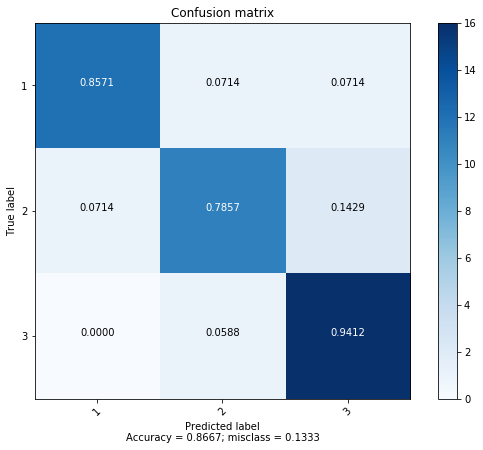

In [55]:
class_labels = [1, 2, 3]

get_confusion_matrix(gw_randomforest, x_test_preprocessed, y_test, class_labels)

Our optimized random forest performed at roughly the same level as it did on the training set. 

### Question 4

* Interpret the confusion matrix. Do any biological questions arise?
* What other classifiers could we use? Implement one.
* What other parameters could we have tuned in this model? Or in the preprocessing steps?
* Another way to preprocess the data is to take combinations of the existing attributes. For instance, we might be interested in the ratio of sulfate to chloride. Can you think of any such combinations of variables that may be enlightening?